In [9]:
import sys
!{sys.executable} -m pip install --upgrade keras_applications==1.0.6 keras==2.2.4
import os, cv2, random

import numpy as np
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
!{sys.executable} -m pip install seaborn
import seaborn as sns
%matplotlib inline

from keras.layers import Input, Dense

from sklearn.metrics import accuracy_score

from keras import backend as K
K.set_image_data_format('channels_last') 

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.2.4 which is incompatible.
You should consider upgrading via the 'c:\users\yangh\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)

You should consider upgrading via the 'c:\users\yangh\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


You should consider upgrading via the 'c:\users\yangh\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\yangh\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
DATA_DIR = './s_celebrity/'              #the folder

import zipfile
with zipfile.ZipFile("s_celebrity.zip","r") as zip_ref:
  zip_ref.extractall('s_celebrity')  


image_file_names = [DATA_DIR+i for i in os.listdir(DATA_DIR)] 
kanes = [DATA_DIR+i for i in os.listdir(DATA_DIR) if 'kane' in i]
kobes = [DATA_DIR+i for i in os.listdir(DATA_DIR) if 'kobe' in i]
ronaldos = [DATA_DIR+i for i in os.listdir(DATA_DIR) if 'ronaldo' in i]
Sharapovas = [DATA_DIR+i for i in os.listdir(DATA_DIR) if 'Sharapova' in i]

random.shuffle(image_file_names)                                         #shuffle the training data

ROWS = 224
COLS = 224
CHANNELS = 3

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)  #read image in color, transfer BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return cv2.resize(img, (ROWS,COLS), interpolation=cv2.INTER_CUBIC)        #adjust the size of image

def prep_data(image_file_names):
    count = len(image_file_names)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)
    
    for i, image_file in enumerate(image_file_names):
        image = read_image(image_file)
        data[i] = image
        if i == count-1: print('Processed {} of {}'.format(count, count))
    
    return data

images = prep_data(image_file_names)                           

Processed 400 of 400


In [11]:
num_train_samples = len(image_file_names)                    
num_classes = 4                                          
labels = []

index = 0
for filename in image_file_names:                         
    if 'kane' in filename:
        labels.append(3)
    if 'kobe' in filename:
        labels.append(2)    
    if 'ronaldo' in filename:
        labels.append(1)    
    elif 'Sharapova' in filename:
        labels.append(0)
        
from keras.utils import np_utils
labels=np_utils.to_categorical(labels, num_classes)                                 #onehot labels

!{sys.executable} -m pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(images, labels, test_size=0.1, random_state=10)

You should consider upgrading via the 'c:\users\yangh\pycharmprojects\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


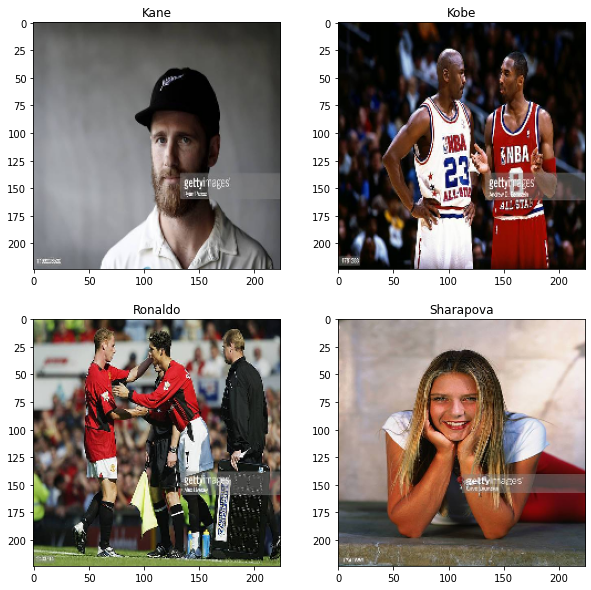

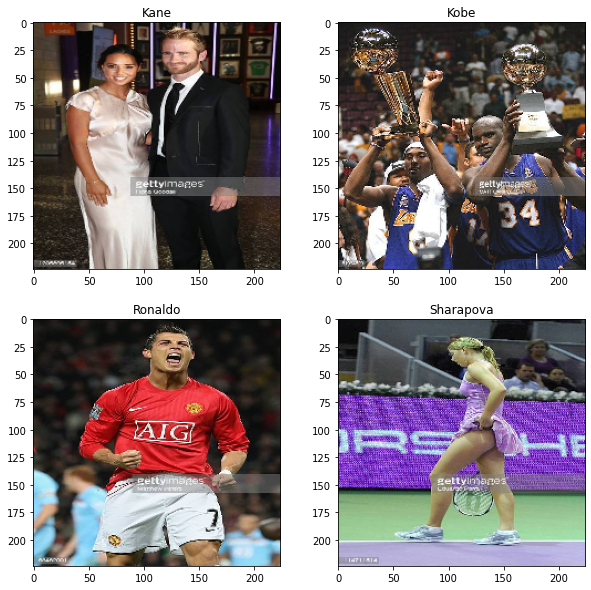

In [12]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return cv2.resize(img, (ROWS,COLS), interpolation=cv2.INTER_CUBIC)       

def show_s_celebrity(i):                                                     #show some examples of the images and their labels
    kane = read_image(kanes[i])
    kobe = read_image(kobes[i])
    ronaldo = read_image(ronaldos[i])
    Sharapova = read_image(Sharapovas[i])
  
    plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.title('Kane')
    plt.imshow(kane)
    plt.subplot(222)
    plt.title('Kobe')
    plt.imshow(kobe)
    plt.subplot(223)
    plt.title('Ronaldo')
    plt.imshow(ronaldo)
    plt.subplot(224)
    plt.title('Sharapova')
    plt.imshow(Sharapova)
        
for i in range(0,2):
    show_s_celebrity(i)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

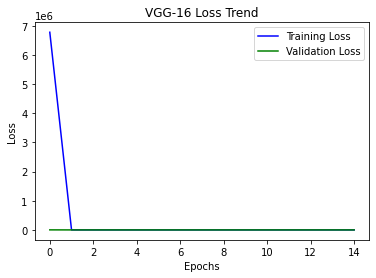

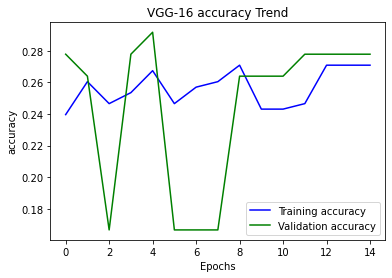

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


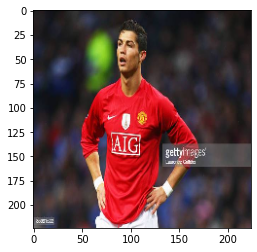

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


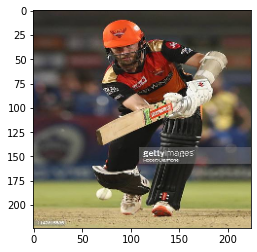

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


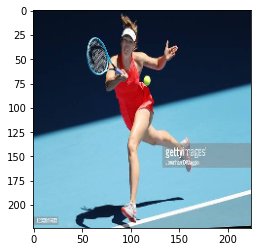

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


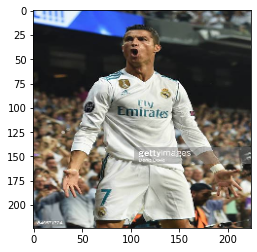

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


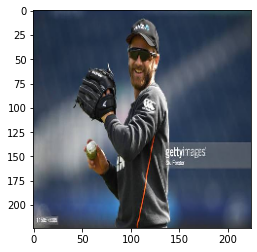

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


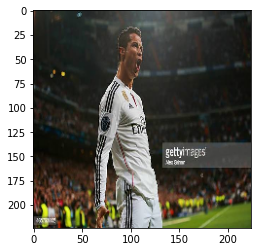

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


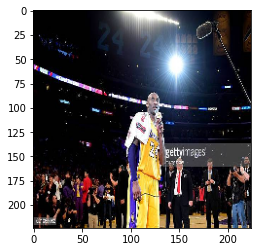

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


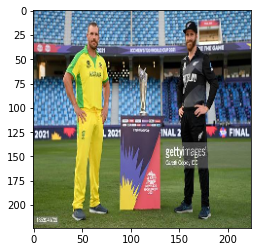

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


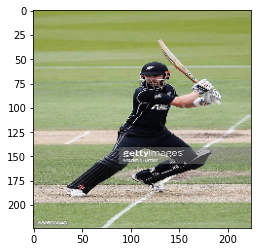

[0.26396522 0.23055117 0.25643855 0.2490451 ]
I am 26.40% sure this is Kane


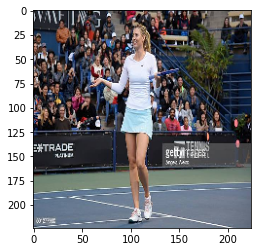

In [18]:
batch_size =  64                                       
learning_rate = 5e-3                           

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=learning_rate)                                    #optimizer

from keras.applications.vgg16 import VGG16
objective = 'categorical_crossentropy'                   #objective function 

from tensorflow.keras.models import Model
def load_model():
    # It's not a pretrained model
    base_model = VGG16(include_top=False,weights=None,input_shape=[ROWS,COLS,CHANNELS],pooling='max')  #don't keep the fully connected layers
    
    prediction_layer = Dense(4, activation='softmax')(base_model.output)        #the prediction layer
    
    model = Model(inputs=base_model.input, outputs=prediction_layer)              #connect the VGG-16 and the prediction layer
    
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])       
    return model

model = load_model()

model.summary()                               #show the structure of VGG-16

from keras.callbacks import Callback, EarlyStopping, TensorBoard
epochs = 15    

#early stopping
#early_stopping = EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='auto')          

def run_train():
    
    history = model.fit(
        train_data, 
        train_label, 
        batch_size=batch_size, 
        epochs=epochs,
        validation_split= 0.2 ,        #the proportion of validation(test) data set
        verbose=2,                          # the result of training, record every epoch 
        shuffle=True,
        callbacks=None)               #change callbacks to 'callbacks=[early_stopping] 'and use earlystopping
    return history

history = run_train()

OUTPUT = 'output'

if not os.path.exists(OUTPUT):
    os.mkdir(OUTPUT)

model.save(os.path.join(OUTPUT, 'model.h5'))

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0, epochs)[0::2])
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('VGG-16 accuracy Trend')
plt.plot(accuracy, 'blue', label='Training accuracy')
plt.plot(val_accuracy, 'green', label='Validation accuracy')
plt.xticks(range(0, epochs)[0::2])
plt.legend()
plt.show()

predictions = model.predict(test_data, verbose=0)

for i in range(0,10):                                              #show some examples of using neural network to classify images
    p = predictions[i]
    maxp = max(p)
    print(p)
  
    if p[0] == maxp: 
        print('I am {:.2%} sure this is Kane'.format(p[0]))
    elif p[1] == maxp: 
        print('I am {:.2%} sure this is Kobe'.format(p[1]))
    elif p[2] == maxp: 
        print('I am {:.2%} sure this is Ronaldo'.format(p[2]))
    else: 
        print('I am {:.2%} sure this is Sharapova'.format(p[3]))
        
    plt.imshow(test_data[i])
    plt.show()